In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib widget

<div dir="rtl">   להלן בעיה: בחברה לייצור מתכות רוצים לבדוק את השפעת מס שעות הדרכת בטיחות בחודש וכמות השקעה כספית בבטיחות המכונות על מספר תאונות שקורות בחודש. 

<div dir="rtl">  ננסה לעשות מודל רגרסיה:

$$\hat{Y} = b_0 + b_1*X_1 + b_2*X_2 $$

<div dir="rtl"> כאשר $X_1$  מציין שעות הדרכה ו $X_2$ מציין השקעה כספית בבטיחות המכונות.

In [2]:
data = pkl.load( open('../pkl/data_lesson_3.pkl', 'rb'))
data.head()

,guidence,invsetment,accidents,Factory_num,intercept,Factory
0,0.0,0.00,345,1.0,1,Haifa
1,0.0,1.25,351,2.0,1,Jerusalem
2,0.0,2.50,348,1.0,1,Haifa
3,0.0,3.75,343,2.0,1,Jerusalem
4,0.0,5.00,337,0.0,1,Ariel


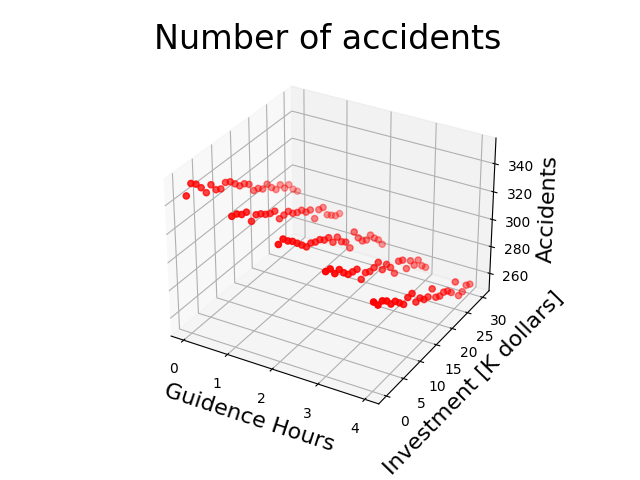

In [3]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Number of accidents' ,fontsize = 24)
ax.scatter(data['guidence'] , data['invsetment'], data['accidents'] , c='r', marker='o')
ax.set_xlabel('Guidence Hours',fontsize = 16)
ax.set_ylabel('Investment [K dollars]',fontsize = 16)
ax.set_zlabel('Accidents',fontsize = 16)

plt.show()

In [4]:
# Create a linear regression model
model = sm.OLS(data['accidents'], data.loc[:, ['intercept', 'guidence', 'invsetment']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     5113.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          2.29e-118
Time:                        13:56:12   Log-Likelihood:                -293.33
No. Observations:                 125   AIC:                             592.7
Df Residuals:                     122   BIC:                             601.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    350.5840      0.550    637.547      0.0

## Statistical significance

<div dir="rtl"> מובהקות הסטטיסטית היא מושג בסטטיסטיקה שעוזר לחוקרים לקבוע האם תוצאות של ניסוי, מחקר או ניתוח סבירותיות להיות משמעותיות או האם הן יכולות לקרות באופן אקראי. זהו מרכיב חשוב בבדיקת היפותזה ונמצא בשימוש כדי לקבוע החלטות מבוססות על נתונים.
הנה הרכיבים המרכזיים והשלבים המעוררים כרוך בהערכת החשיבות הסטטיסטית:

<div dir="rtl"> השערת אפס (H0): השערת אפס היא הצהרה שאין פעולה או קשר משמעותי בנתונים. היא משמשת כהנחה בסיסית לנסיון. לדוגמה, בניסוי תרופות, השערת האפס עשויה להיות שהתרופה החדשה אינה משפיעה בצורה משמעותית בהשוואה למזין פלסבו.


<div dir="rtl"> השערת אלטרנטיבה (Ha): השערת אלטרנטיבה היא ההצהרה שחוקרים רוצים לתמוך או להוכיח. היא מרמזת על פעולה או קשר משמעותי בנתונים. בדוגמה של ניסוי תרופות, השערת האלטרנטיבה עשויהה לציין שהתרופה החדשה יעילה יותר מהפלסבו.


<div dir="rtl"> רמת מובהקות (α): רמת המובהקות, שנקראת גם אלפא (α), מייצגת את הסיכוי לביצוע שגיאת סוג I. שגיאת סוג I. רמות מובהקות הנפוצות הן 0.05 (5%) ו־0.01 (1%).
שגיאה זו מציינת מקרה בו לא דוחים את השערת ה-0 למרות שהיינו צריכים.

<div dir="rtl">ערך p_value: ערך p_value הוא מדידה של הראייה נגד השערת האפס. הוא מציין את הסיכוי לקבלת התוצאות שנראות (או תוצאות יותר קיצוניות) אם השערת האפס היא נכונה. ערך p_value קטן (בדרך כלל פחות מאלפא) מרמז על ראייה חזקה נגד השערת האפס.


<div dir="rtl">להלן כיצד התהליך פועל:


<div dir="rtl"> החוקרים אוספים נתונים ומבצעים ניתוח סטטיסטי.
הם מחשבים מובהקות סטטיסטית בהתבסס על הנתונים.
מחשבים את ערך p_value, שמציין את הסיכוי לראות את הנתונים שנראים אם השערת האפס היא נכונה.
אם ערך p_value קטן מאלפא או זהה לו, החוקרים דוחים את השערת האפס לטובת השערת האלטרנטיבה

<div dir="rtl"> גם כשאנחנו עושים מודל רגרסיה אנחנו עושים מבחן סטטיסטי. המבחן בעצם מתייחס לפרמטרים של המודל: $b_0$, $b_1$, $b_2$ .

<div dir="rtl"> פורמלית המבחן עבור כל פרמטר נראה כך:

$$H_0: b_0 = 0, H_1: b_0 \neq 0$$
$$H_0: b_1 = 0, H_1: b_1 \neq 0$$
$$H_0: b_2 = 0, H_1: b_2 \neq 0$$


<div dir="rtl"> נרצה לבדוק האם כל משתנה הוא מובהק סטטיסטית ואז נוכל להכניסו למודל. מקובל לבדוק ברמת מובהקות של 0.05.  נבדוק את התוצאה בפלט של המודל בעמודה $P >|t|$.

<div dir="rtl"> לפי הפלט כולם קטנים מ 0.05. למעשה כולם שואפים ל-0 מה שמצביע על תוצאות מאד מובהקות.

<div dir="rtl">  אם אחד הפרמטרים לא נכנס למודל אז נוציא את המשתנה ונבנה מודל חדש.

In [5]:
data['preds'] = results.predict(data.loc[:, ['intercept', 'guidence', 'invsetment']])

In [6]:
data.loc[data['guidence']==1,:].head(5)

,guidence,invsetment,accidents,Factory_num,intercept,Factory,preds
25,1.0,0.00,340,1.0,1,Haifa,340.312
26,1.0,1.25,339,0.0,1,Ariel,337.812
27,1.0,2.50,336,0.0,1,Ariel,335.312
28,1.0,3.75,335,1.0,1,Haifa,332.812
29,1.0,5.00,326,0.0,1,Ariel,330.312


In [7]:
def linear_surface_eq(guidence, invsetment):
    return 349.8622 -10.2720*guidence-2.000 *invsetment


<div dir="rtl"> נציג ויזאולית את הנתונים על גבי המישור הליניארי שלמדנו. 

In [8]:
data['guidence'].shape, data['invsetment'].shape

((125,), (125,))

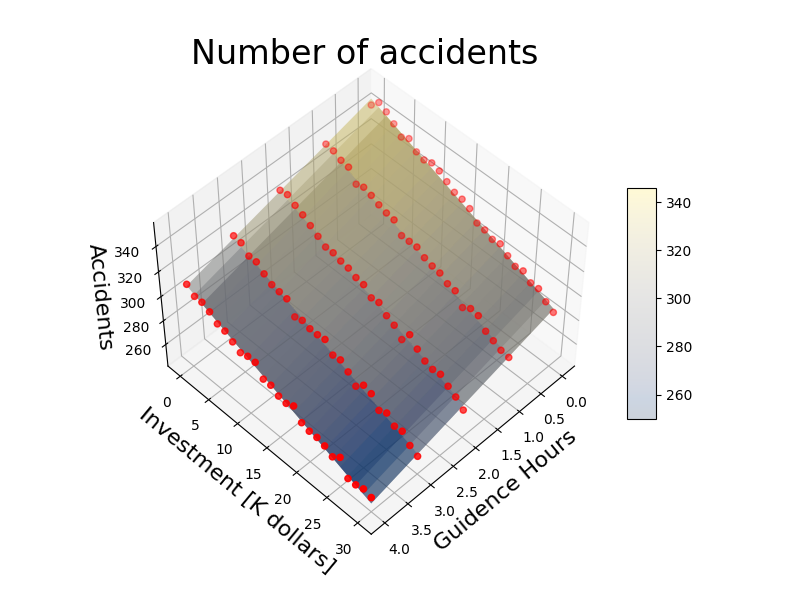

In [10]:
# 
X, Y = np.meshgrid(data['guidence'], data['invsetment'])
Z = linear_surface_eq(X, Y)

fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection='3d')

surf1 = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis, alpha = 0.2)
# ax.scatter(X_data[:,0], X_data[:,1], data)
# Set axes label
ax.set_xlabel('Guidence Hours',fontsize = 16)
ax.set_ylabel('Investment [K dollars]',fontsize = 16)
ax.set_zlabel('Accidents',fontsize = 16)
plt.title('Number of accidents' ,fontsize = 24)
ax.scatter(data['guidence'] , data['invsetment'], data['accidents'] , c='r', marker='o')
fig.colorbar(surf1, shrink=0.5, aspect=8)
ax.view_init(elev=50., azim=45)
plt.show()

<div dir="rtl"> מה זה meshgrid?
זוהי פונקצייה שלוקחת שני וקטורים והופכת אותם למטריצות כך שהן פורסות מרחב דו ממדי. למשל: 

In [11]:
a = np.array([1,2,3])
b = np.array([4,5,6])
A, B = np.meshgrid(a,b)
A, B

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]]))

<div dir="rtl">  ניתן גם להציג את המשוואה בדו מימד באופן הבא:

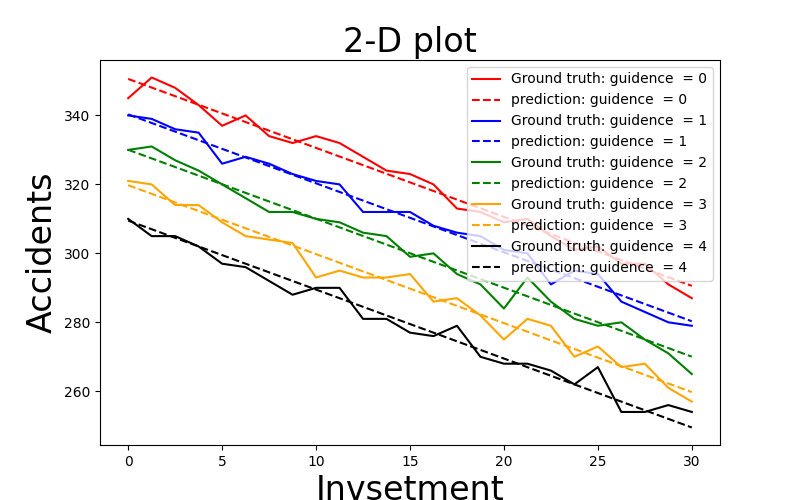

In [12]:
colors = ['red', 'blue', 'green', 'orange', 'black']
plt.figure(figsize=(8,5))
plt.title('2-D plot' ,fontsize = 24)
for guidence in [0,1,2,3,4]:
    plt.plot(data.loc[data['guidence']==guidence,'invsetment'], data.loc[data['guidence']==guidence,'accidents'], label  = 'Ground truth: guidence  = '+str(guidence), color = colors[guidence] )
    plt.plot(data.loc[data['guidence']==guidence,'invsetment'], data.loc[data['guidence']==guidence,'preds'], label  = 'prediction: guidence  = '+str(guidence) , linestyle='dashed', color = colors[guidence])
    plt.xlabel('Invsetment', fontsize = 24)
    plt.ylabel('Accidents', fontsize = 24)
plt.legend()
plt.show()

## Dummy variables

<div dir="rtl">  משתני דמה: לעיתים יש לנו משתנים שהם קטגוריאלים וייתכן שהם ישפיעו על המודל. למשל בדוגמא שלנו ייתכן שגם מיקום המפעל ישפיע על כמות תאונות. הבעיה היא שמודל רגרסיה מצפה למשתנים עם ערכים מספריים. ננסה להתגבר על אתגר זה.

<div dir="rtl">  בדוגמא יש לנו 3 מיקומים שונים, אריאל, חיפה וירושלים. במקרה של 3 קטגוריות מוסיפים שני משתני דמה (הכלל הוא תמיד אחד פחות). המשתנה הראשון הוא משתנה בינארי שמציין האם הנתון מגיע מאריאל או לא נסמן ב$d_1$, והמשתנה השני מצביע על האם הנתון מגיע מחיפה או לא נסמן ב$d_2$. זה מצוין על ידי 0 ו-1, 0 אם לא, 1 אם כן. אם הערכים של שני משתני הדמה הם 0 משמעות הדבר שהנתון מגיע מירושלים. מודל הרגרסיה נראה כך:

$$ \hat{Y} = b_0 + b_1*X_1 +b_2 *X_2 + d_1 * D_1 +d_2* D_2 $$

In [13]:
dummy_variables = pd.get_dummies(data['Factory'])

# Concatenate dummy variables with the original DataFrame and drop the original column
data = pd.concat([data, dummy_variables], axis=1)

data.head()

,guidence,invsetment,accidents,Factory_num,intercept,Factory,preds,Ariel,Haifa,Jerusalem
0,0.0,0.00,345,1.0,1,Haifa,350.584,0,1,0
1,0.0,1.25,351,2.0,1,Jerusalem,348.084,0,0,1
2,0.0,2.50,348,1.0,1,Haifa,345.584,0,1,0
3,0.0,3.75,343,2.0,1,Jerusalem,343.084,0,0,1
4,0.0,5.00,337,0.0,1,Ariel,340.584,1,0,0


In [14]:
# Create a linear regression model
model = sm.OLS(data['accidents'], data.loc[:, ['intercept', 'guidence', 'invsetment', 'Ariel','Haifa']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2554.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          4.68e-115
Time:                        13:56:42   Log-Likelihood:                -292.38
No. Observations:                 125   AIC:                             594.8
Df Residuals:                     120   BIC:                             608.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    350.1309      0.648    539.951      0.0

In [15]:
data['preds'] = results.predict(data.loc[:, ['intercept', 'guidence', 'invsetment', 'Ariel','Haifa']])

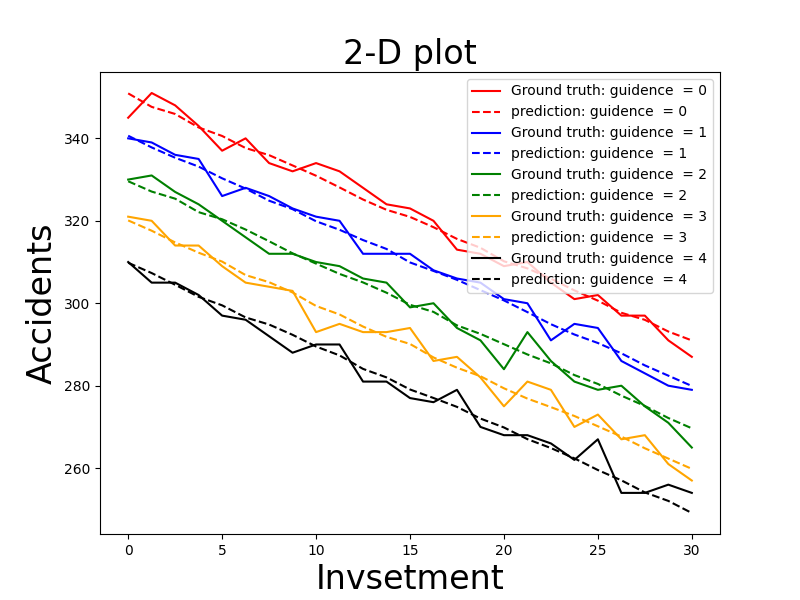

In [16]:
colors = ['red', 'blue', 'green', 'orange', 'black']
plt.figure(figsize=(8,6))
plt.title('2-D plot' ,fontsize = 24)
for guidence in [0,1,2,3,4]:
    plt.plot(data.loc[data['guidence']==guidence,'invsetment'], data.loc[data['guidence']==guidence,'accidents'], label  = 'Ground truth: guidence  = '+str(guidence), color = colors[guidence] )
    plt.plot(data.loc[data['guidence']==guidence,'invsetment'], data.loc[data['guidence']==guidence,'preds'], label  = 'prediction: guidence  = '+str(guidence) , linestyle='dashed', color = colors[guidence])
    plt.xlabel('Invsetment', fontsize = 24)
    plt.ylabel('Accidents', fontsize = 24)
plt.legend()
plt.show()

<div dir="rtl">  ננסה עכשיו לעשות תחזית עבור ערך בודד: כמה תאונות צפויות בירושלים אם אין הדרכות בכלל ומשקיעים 5000 דולר בבטיחות?

In [17]:
results.predict(np.array([1, 0, 5, 0,0]))

array([340.14386333])

<div dir="rtl">  ה-1 בהתחלה מציין את העובדה שיש חותך במשוואה, 0 מציין שאין שעות הדרכה, 5 מציין את ההשקעה בבטיחות ושני האפסים בסוף מציינים שזה לא באריאל ולא בחיפה - דהיינו בירושלים.

## Multicollinearity 

<div dir="rtl"> לא נרצה להכניס את כל משתני הדמה למודל כי אז תהיה לנו תלות בין המשתנים. דבר כזה יכול לגרום לשונות גדולה בתחזית.